In [1]:
import pandas as pd
import wbgapi as wb
import numpy as np
import matplotlib.pyplot as plt
import requests # library to handle requests
import lxml
from bs4 import BeautifulSoup # library to parse HTML documents

## WEF TandT

In [2]:
wef = pd.read_excel(r'../../../datasets/general/WEF_TTDI_2024_edition_data.xlsx', sheet_name='Ranking Table', header=[0, 1], index_col=0)
df_countries = pd.read_excel(r'../../../datasets/unwto/countryContUNWTO.xlsx')
wef = wef[wef.index.isin(df_countries['iso3_code'].unique())]


In [3]:
wef_tt_rank = wef['Business Environment pillar'].sort_values(by = ['2021 Rank'], ascending=True)
wef_tt_rank = wef_tt_rank.reset_index().rename(columns = {'index': 'iso3_country_code'})

In [6]:
print(wef['Business Environment pillar'].sort_values(by = ['2024 Rank'], ascending=True).head(5).to_markdown())

|     |   2019 Value |   2019 Rank |   2021 Value |   2021 Rank |   2024 Value |   2024 Rank |   2021-2024 % Dif Score |   2021-2024 Rank Change |   2019-2024 % Dif Score |   2019-2024 Rank Change |
|:----|-------------:|------------:|-------------:|------------:|-------------:|------------:|------------------------:|------------------------:|------------------------:|------------------------:|
| MUS |      4.735   |          30 |      4.91696 |          30 |      4.90719 |          34 |             -0.00198692 |                      -4 |               0.0363637 |                      -4 |
| BWA |      4.29483 |          49 |      4.57075 |          47 |      4.71066 |          42 |              0.0306105  |                       5 |               0.0968221 |                       7 |
| RWA |      4.41429 |          44 |      4.47049 |          50 |      4.33114 |          55 |             -0.0311711  |                      -5 |              -0.0188363 |                     -11 |
| MAR

In [8]:
print(wef['Non-Leisure Resources pillar'].sort_values(by = ['2024 Rank'], ascending=True).head(5).to_markdown())

|     |   2019 Value |   2019 Rank |   2021 Value |   2021 Rank |   2024 Value |   2024 Rank |   2021-2024 % Dif Score |   2021-2024 Rank Change |   2019-2024 % Dif Score |   2019-2024 Rank Change |
|:----|-------------:|------------:|-------------:|------------:|-------------:|------------:|------------------------:|------------------------:|------------------------:|------------------------:|
| ZAF |      3.83283 |          24 |      4.05468 |          20 |      4.19003 |          18 |               0.0333814 |                       2 |             0.0931962   |                       6 |
| MAR |      3.08421 |          40 |      2.86817 |          44 |      2.90087 |          40 |               0.0114019 |                       4 |            -0.0594454   |                       0 |
| TUN |      2.64031 |          49 |      2.58695 |          49 |      2.64087 |          44 |               0.0208405 |                       5 |             0.000211381 |                       5 |
| NGA

/var/folders/6c/vby383sn3xlg0j_c253f0sf40000gn/T/ipykernel_36841/3282078258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['ttind'] = wef['Travel & Tourism Development Index ']['2021 Value'].copy()


<Axes: xlabel='ttind'>

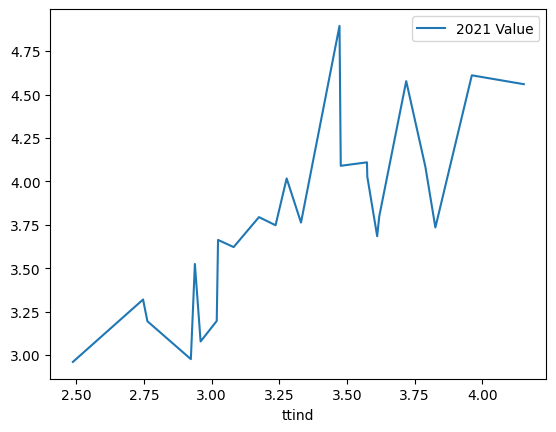

In [23]:
testdf = wef['Business Environment pillar']
testdf['ttind'] = wef['Travel & Tourism Development Index ']['2021 Value'].copy()
testdf.plot(kind='line', y = '2021 Value', x='ttind')

In [305]:
eob = wb.data.DataFrame('IC.BUS.EASE.XQ', wb.region.members('AFR'))

In [306]:
eob = eob[['YR2019']]
print(eob.sort_values(by = ['YR2019'],ascending=True).head(10).to_markdown())

| economy   |   YR2019 |
|:----------|---------:|
| MUS       |       13 |
| RWA       |       38 |
| MAR       |       53 |
| KEN       |       56 |
| TUN       |       78 |
| ZAF       |       84 |
| ZMB       |       85 |
| BWA       |       87 |
| TGO       |       97 |
| SYC       |      100 |


## UNWTO

In [278]:
df_complete = pd.read_excel(r'../../../datasets/ddt/ddt_complete.xlsx')
df_complete = df_complete.drop(columns=['Unnamed: 0'])
# Display the first few rows of the merged dataframe
df_complete.head()

,iso3_country_code,indicator_year,indicator_value,indicator_ddt_name,indicator_source,indicator_ddt_cat,country_name,region_name,units
0,DZA,1995,520.0,Total International Arrivals,UNWTO,Inbound Tourism-Arrivals,Algeria,Northern Africa,Thousands
1,AGO,1995,9.0,Total International Overnight Visitors (Tourists),UNWTO,Inbound Tourism-Arrivals,Angola,Central Africa,Thousands
2,BEN,1995,580.0,Total International Arrivals,UNWTO,Inbound Tourism-Arrivals,Benin,Western Africa,Thousands
3,BEN,1995,138.0,Total International Overnight Visitors (Tourists),UNWTO,Inbound Tourism-Arrivals,Benin,Western Africa,Thousands
4,BWA,1995,636.0,Total International Arrivals,UNWTO,Inbound Tourism-Arrivals,Botswana,Southern Africa,Thousands


In [289]:
df_complete.query("indicator_ddt_name ==       'Total (Employment)'")

,iso3_country_code,indicator_year,indicator_value,indicator_ddt_name,indicator_source,indicator_ddt_cat,country_name,region_name,units
24507,MDG,1995,13.355,Total (Employment),UNWTO,Employment,Madagascar,Eastern Africa,Thousands
24511,MDG,1996,13.707,Total (Employment),UNWTO,Employment,Madagascar,Eastern Africa,Thousands
24515,MDG,1997,13.979,Total (Employment),UNWTO,Employment,Madagascar,Eastern Africa,Thousands
24519,MDG,1998,14.363,Total (Employment),UNWTO,Employment,Madagascar,Eastern Africa,Thousands
24523,MDG,1999,15.574,Total (Employment),UNWTO,Employment,Madagascar,Eastern Africa,Thousands
...,...,...,...,...,...,...,...,...,...
25389,AGO,2022,192.000,Total (Employment),UNWTO,Employment,Angola,Central Africa,Thousands
25393,CIV,2022,148.200,Total (Employment),UNWTO,Employment,Côte d'Ivoire,Western Africa,Thousands
25394,DJI,2022,1.892,Total (Employment),UNWTO,Employment,Djibouti,Eastern Africa,Thousands
25400,MUS,2022,27.626,Total (Employment),UNWTO,Employment,Mauritius,Eastern Africa,Thousands


In [3]:
df_complete.indicator_ddt_name.unique()

array(['Total International Arrivals',
       'Total International Overnight Visitors (Tourists)',
       'Total International Same-day Visitors (Excursionists)',
       'Total Travelers Originating From Africa',
       'Total Travelers Originating From Americas',
       'Total Travelers Originating From East Asia and the Pacific',
       'Total Travelers Originating From Europe',
       'Total Travelers Originating From Middle East',
       'Total Travelers Originating From Other not classified',
       'Total Travelers Originating From of which, nationals residing abroad',
       'Total Travelers Originating From South Asia',
       'Total (Inbound Tourism-Purpose)', 'Total Personal Travelers',
       'Total Business and Professional Travelers',
       'Total (Inbound Tourism-Transport)', 'Total Travelers by Air',
       'Total Travelers by Water', 'Total Travelers by Land',
       'Expenditure on Travel', 'Expenditure on Passenger Transport',
       'Total Domestic Trips', 'Total In

In [279]:
# Step 1: Filter and reshape the data
relevant_indicators = ['Total Number of Rooms', 'Total Number of Bed Places',
       'Total Occupancy Rate / Bed-Places',
       'Total Occupancy Rate / Rooms']
filtered_df = df_complete[df_complete['indicator_ddt_name'].isin(relevant_indicators)]

# Pivot the DataFrame
pivoted_df = filtered_df.pivot_table(index=['iso3_country_code', 'indicator_year', 'region_name'],
                                     columns='indicator_ddt_name', 
                                     values='indicator_value').reset_index()

#pivoted_df['Perc Business Travelers'] = pivoted_df['Total Business and Professional Travelers']	/pivoted_df['Total (Inbound Tourism-Purpose)']
business_df_2021 = pivoted_df[pivoted_df['indicator_year'] == 2022]
#business_df_2022 = pivoted_df[pivoted_df['indicator_year'] == 2022]
business_df_2018 = pivoted_df[pivoted_df['indicator_year'] == 2017]
business_df_2018 = business_df_2018.rename(columns={'Total Number of Rooms' : 'Total Number of Rooms 2017', 'Total Number of Bed Places' : 'Total Number of Bed Places 2017'})
business_df_2021 = business_df_2021.merge(business_df_2018[['Total Number of Rooms 2017', 'Total Number of Bed Places 2017', 'iso3_country_code']], how='left', on='iso3_country_code' )
business_df_2021['Growth From 2017'] = (business_df_2021['Total Number of Rooms'] - business_df_2021['Total Number of Rooms 2017']) /  business_df_2021['Total Number of Rooms 2017']
business_df_2021.sort_values(by=['Total Number of Rooms'], ascending=False)

indicator_ddt_name,iso3_country_code,indicator_year,region_name,Total Number of Bed Places,Total Number of Rooms,Total Occupancy Rate / Bed-Places,Total Occupancy Rate / Rooms,Total Number of Rooms 2017,Total Number of Bed Places 2017,Growth From 2017
6,EGY,2022,Northern Africa,425178.0,393570.0,NaN,46.00,211678.0,423356.0,0.859286
8,MAR,2022,Northern Africa,289321.0,132607.0,34.00,41.00,118934.0,251234.0,0.114963
16,TUN,2022,Northern Africa,229733.0,114866.0,30.60,NaN,117169.0,234338.0,-0.019655
2,CIV,2022,Western Africa,130932.0,73325.0,NaN,53.22,39030.0,78060.0,0.878683
17,ZAF,2022,Southern Africa,NaN,72100.0,NaN,35.40,72000.0,NaN,0.001389
10,MOZ,2022,Eastern Africa,70190.0,43780.0,NaN,NaN,34687.0,56999.0,0.262144
1,BFA,2022,Western Africa,33184.0,16847.0,12.20,23.70,11041.0,21913.0,0.525858
0,AGO,2022,Central Africa,18590.0,15728.0,21.09,27.78,13344.0,16879.0,0.178657
3,CPV,2022,Western Africa,28851.0,15257.0,52.00,NaN,12463.0,20421.0,0.224184
9,MLI,2022,Western Africa,18790.0,13914.0,NaN,NaN,11277.0,17264.0,0.233839


In [344]:
# Step 1: Filter and reshape the data
relevant_indicators = ['Total International Arrivals', 'Total (Employment)','Total Personal Travelers', 'Total Business and Professional Travelers', 'Total (Inbound Tourism-Purpose)']
filtered_df = df_complete[df_complete['indicator_ddt_name'].isin(relevant_indicators)]

# Pivot the DataFrame
pivoted_df = filtered_df.pivot_table(index=['iso3_country_code', 'indicator_year', 'region_name'],
                                     columns='indicator_ddt_name', 
                                     values='indicator_value').reset_index()

pivoted_df['Perc Business Travelers'] = pivoted_df['Total Business and Professional Travelers']	/pivoted_df['Total (Inbound Tourism-Purpose)']
business_df_2021 = pivoted_df[pivoted_df['indicator_year'] == 2019]
business_df_2018 = pivoted_df[pivoted_df['indicator_year'] == 2017]
business_df_2018 = business_df_2018.rename(columns={'Total Business and Professional Travelers' : 'Total Business and Professional Travelers 2017'})
business_df_2021 = business_df_2021.merge(business_df_2018[['Total Business and Professional Travelers 2017', 'iso3_country_code']], how='left', on='iso3_country_code' )
business_df_2021['Growth From 2017'] = (business_df_2021['Total Business and Professional Travelers'] - business_df_2021['Total Business and Professional Travelers 2017']) /  business_df_2021['Total Business and Professional Travelers 2017']
#business_df_2021.sort_values(by=['Total Business and Professional Travelers'], ascending=False)

In [345]:
business_df_2021[~business_df_2021['Total Business and Professional Travelers'].isna()].drop_duplicates().shape

(32, 11)

In [302]:
columns_to_multiply = ['Total (Employment)', 'Total Business and Professional Travelers']

# Multiply the selected columns by 1000
business_df_2021[columns_to_multiply] = business_df_2021[columns_to_multiply] * 1000

business_df_2021[['Total (Employment)', 'Total Business and Professional Travelers', 'iso3_country_code']].dropna().drop_duplicates()

indicator_ddt_name,Total (Employment),Total Business and Professional Travelers,iso3_country_code
0,215500.0,49500.0,AGO
18,128800.0,885700.0,CIV
26,2000.0,8100.0,COM
32,320000.0,158100.0,DZA
44,547000.0,621700.0,GHA
58,565000.0,1416800.0,MAR
62,47400.0,40400.0,MDG
74,31550.0,56000.0,MUS
89,14900.0,40900.0,REU
94,38400.0,26600.0,SLE


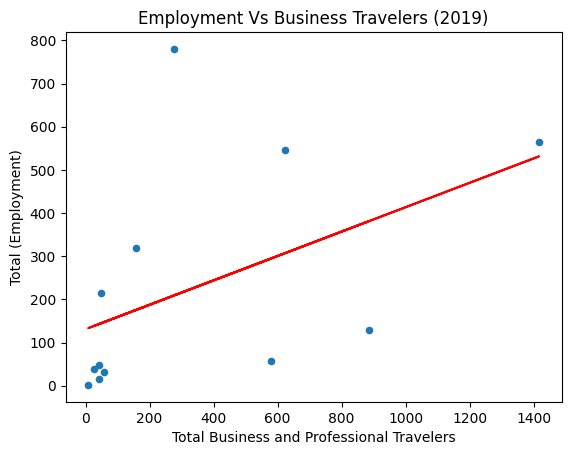

In [21]:
business_df_2021 = business_df_2021.dropna(subset=['Total (Employment)', 'Total Business and Professional Travelers'])
ax = business_df_2021.plot(x='Total Business and Professional Travelers', y='Total (Employment)', kind='scatter')

# Calculate the trend line
x = business_df_2021['Total Business and Professional Travelers'].dropna()
y = business_df_2021['Total (Employment)'].dropna()
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(x, p(x), color='red')
plt.title('Employment Vs Business Travelers (2019)')
# Show the plot
plt.show()

In [413]:
pd.DataFrame(pivoted_df.groupby('indicator_year')['Total Business and Professional Travelers'].sum())

,Total Business and Professional Travelers
indicator_year,
1995,2663.800
1996,3509.000
1997,3485.000
1998,3608.100
1999,3227.800
2000,3284.800
2001,3514.800
2002,3034.800
2003,3153.100


In [401]:
pd.DataFrame(pivoted_df.groupby('indicator_year')['Perc Business Travelers'].mean())

,Perc Business Travelers
indicator_year,
1995,0.280665
1996,0.269491
1997,0.254251
1998,0.289376
1999,0.264095
2000,0.274513
2001,0.252759
2002,0.267652
2003,0.264853


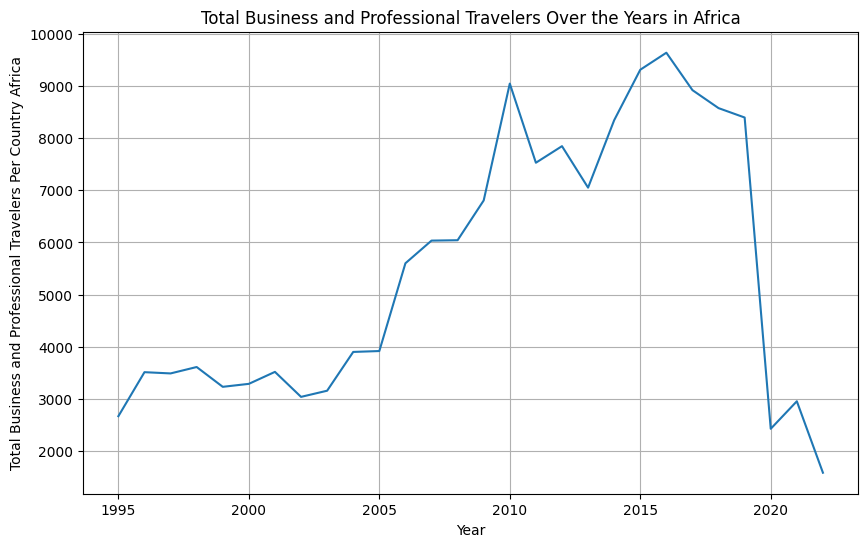

In [88]:
# Group by region_name and year, then sum the Total Business and Professional Travelers
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 6))

# # Plot each region
# for region in grouped_df['region_name'].unique():
#     region_data = grouped_df[grouped_df['region_name'] == region]
#     plt.plot(region_data['indicator_year'], region_data['Total Business and Professional Travelers'], marker='o', label=region)
pivoted_df.groupby('indicator_year')['Total Business and Professional Travelers'].sum().plot(kind = 'line')
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Business and Professional Travelers Per Country Africa')
plt.title('Total Business and Professional Travelers Over the Years in Africa')
#plt.legend(title='Region')
plt.grid(True)
plt.show()


<Axes: xlabel='indicator_year'>

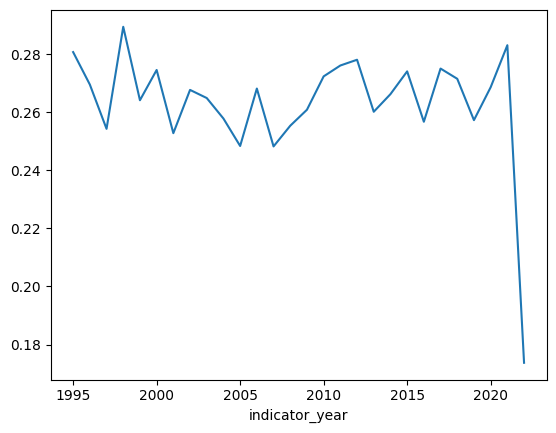

In [78]:
pivoted_df.groupby('indicator_year')['Perc Business Travelers'].mean().plot(kind = 'line')

In [412]:
grouped_df = pivoted_df.groupby(['region_name', 'indicator_year'])['Total Business and Professional Travelers'].sum().reset_index()
grouped_df.pivot_table(values='Total Business and Professional Travelers', index=['indicator_year'], columns=['region_name']).reset_index()

region_name,indicator_year,Central Africa,Eastern Africa,Northern Africa,Southern Africa,Western Africa
0,1995,59.900,494.100,1174.0,727.0,208.8
1,1996,28.700,858.700,1042.0,938.0,641.6
2,1997,40.200,1032.400,965.0,883.0,564.4
3,1998,65.400,1026.600,933.0,1044.0,539.1
4,1999,62.000,1238.900,523.0,835.0,568.9
5,2000,20.000,1133.000,462.0,894.0,775.8
6,2001,20.600,1408.500,447.0,941.0,697.7
7,2002,33.600,1109.900,239.0,868.0,784.3
8,2003,41.700,1130.300,354.0,786.0,841.1
9,2004,45.500,1893.700,413.0,619.0,926.6


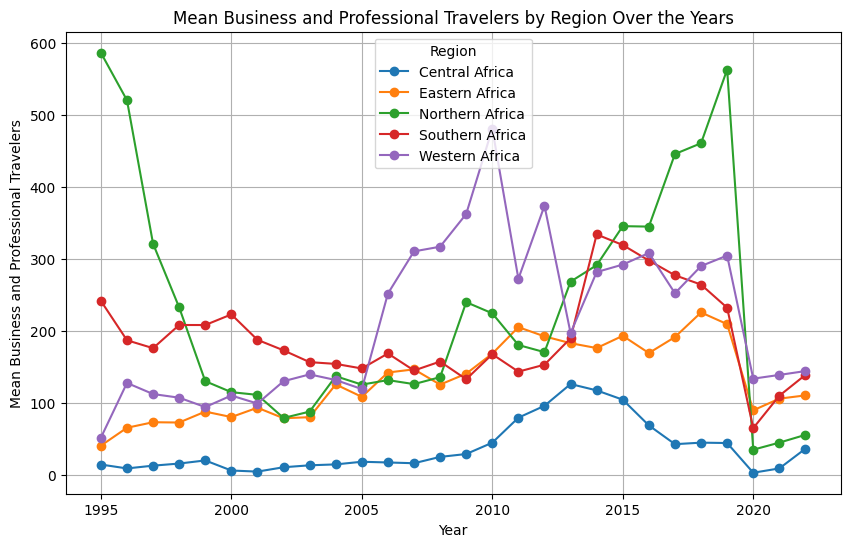

In [86]:
# Group by region_name and year, then sum the Total Business and Professional Travelers
import matplotlib.pyplot as plt

grouped_df = pivoted_df.groupby(['region_name', 'indicator_year'])['Total Business and Professional Travelers'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Plot each region
for region in grouped_df['region_name'].unique():
    region_data = grouped_df[grouped_df['region_name'] == region]
    plt.plot(region_data['indicator_year'], region_data['Total Business and Professional Travelers'], marker='o', label=region)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Mean Business and Professional Travelers')
plt.title('Mean Business and Professional Travelers by Region Over the Years')
plt.legend(title='Region')
plt.grid(True)
plt.show()


In [107]:
import plotly.express as px

# Filter the Data for 2022
df_2022 = pivoted_df[pivoted_df['indicator_year'] == 2022]

# Calculate Personal Travelers
# Melt the DataFrame to have 'Personal' and 'Business' categories
df_melted = df_2022.melt(id_vars=['iso3_country_code', 'region_name'], 
                         value_vars=['Total Personal Travelers', 'Total Business and Professional Travelers'],
                         var_name='traveler_type', value_name='count')

# Create the treemap
fig = px.treemap(df_melted, 
                 path=['iso3_country_code', 'traveler_type'], 
                 values='count',
                 color='traveler_type',
                 title='Total Travel in Africa by Country and Traveler Type for 2022',  
                 color_discrete_map={'Total Personal Travelers': 'lightblue', 'Total Business and Professional Travelers': 'lightgreen'})

fig.update_layout(
    legend=dict(
        title="Traveler Type",
        orientation="h",  # 'h' for horizontal, 'v' for vertical
        y=1.02,
        x=0.5,
        xanchor='center',
        yanchor='bottom'
    )
)
# Show the treemap
fig.show()


In [36]:
print(business_df_2021.groupby('region_name')['Total Business and Professional Travelers'].mean().sort_values(ascending=False).to_markdown())

| region_name     |   Total Business and Professional Travelers |
|:----------------|--------------------------------------------:|
| Western Africa  |                                     144.8   |
| Southern Africa |                                     139.5   |
| Eastern Africa  |                                     111.014 |
| Northern Africa |                                      56.2   |
| Central Africa  |                                      37     |


In [40]:
print(business_df_2021.sort_values(by=['Perc Business Travelers'], ascending=False).head(5).to_markdown())

|    | iso3_country_code   |   indicator_year | region_name     |   Total (Inbound Tourism-Purpose) |   Total Business and Professional Travelers |   Total International Arrivals |   Perc Business Travelers |   Total Business and Professional Travelers 2017 |   Growth From 2017 |
|---:|:--------------------|-----------------:|:----------------|----------------------------------:|--------------------------------------------:|-------------------------------:|--------------------------:|-------------------------------------------------:|-------------------:|
|  1 | BFA                 |             2022 | Western Africa  |                             530.7 |                                       271   |                          nan   |                  0.510646 |                                            317.6 |          -0.146725 |
|  4 | DJI                 |             2022 | Eastern Africa  |                             144.9 |                                        68.1 |          

### PLots

## World Bank

In [325]:
def obtain_wb_data(indic, range_start = 1995, range_end = 2023):
    indic_df = wb.data.DataFrame(indic, wb.region.members('AFR'))
    indic_df = indic_df.reset_index()
    # 1. Change column names to keep only the years
    indic_df.columns = [col.replace('YR', '') if 'YR' in col else col for col in indic_df.columns]

    # 2. Keep only columns from 1995 to 2021 (inclusive)
    columns_to_keep = ['economy'] + [str(year) for year in range(range_start, range_end)]
    indic_df = indic_df[columns_to_keep]
    indic_df = indic_df.rename(columns = {'economy' : 'iso3_country_code'})
    return indic_df

def wb_list_indic_df(list_indic,wb_lookup, year = '2019'):
    final_df = pd.DataFrame()
    for indic in list_indic:
        #print(indic)
        indic_df = obtain_wb_data(indic)
        indic_df = indic_df[['iso3_country_code', year]]
        indic_df = indic_df.rename(columns = {'2019' : f"{wb_lookup[indic]}_2019"})
        if 'iso3_country_code' not in final_df.columns.to_list():
            final_df = indic_df
        else:
            final_df = final_df.merge(indic_df, on= 'iso3_country_code')
    
    return final_df


In [326]:
look_up = pd.DataFrame(wb.series.Series())
look_up = dict(zip(look_up.index, look_up['SeriesName']))
wb_list_business = ['IC.REG.PROC.MA', 'IC.REG.PROC.FE', 'IC.REG.DURS.MA', 'IC.REG.DURS.FE','IC.REG.DURS', 
                    'IC.BUS.NREG', 'IC.REG.PROC', 'IE.PPI.TRAN.CD', 'IE.PPN.ICTI.CD', 'BX.KLT.DINV.WD.GD.ZS']

wb_business_df = wb_list_indic_df(wb_list_business, look_up)

In [328]:
wb_business_df.head()

,iso3_country_code,"Start-up procedures to register a business, male (number)_2019","Start-up procedures to register a business, female (number)_2019","Time required to start a business, male (days)_2019","Time required to start a business, female (days)_2019",Time required to start a business (days)_2019,New businesses registered (number)_2019,Start-up procedures to register a business (number)_2019,Investment in transport with private participation (current US$)_2019,Public private partnerships investment in ICT (current US$)_2019,"Foreign direct investment, net inflows (% of GDP)_2019"
0,AGO,8.0,8.0,36.0,36.0,36.0,NaN,8.0,NaN,NaN,-5.780813
1,BDI,4.0,4.0,5.0,5.0,5.0,NaN,4.0,NaN,NaN,0.040557
2,BEN,5.0,6.0,8.0,9.0,8.5,3437.0,6.0,NaN,NaN,1.516311
3,BFA,3.0,3.0,13.0,13.0,13.0,NaN,3.0,NaN,NaN,1.016479
4,BWA,9.0,9.0,48.0,48.0,48.0,17377.0,9.0,NaN,NaN,0.559653


In [76]:
print(wb_business_df[['iso_country_code3','New businesses registered (number)_2019']].sort_values(by='New businesses registered (number)_2019', ascending=False).head(5).to_markdown())

|    | iso_country_code3   |   New businesses registered (number)_2019 |
|---:|:--------------------|------------------------------------------:|
| 51 | ZAF                 |                                    409536 |
| 36 | NGA                 |                                     90748 |
| 27 | MAR                 |                                     49909 |
| 23 | KEN                 |                                     42085 |
| 53 | ZWE                 |                                     25028 |


<Axes: xlabel='Start-up procedures to register a business (number)_2019', ylabel='New businesses registered (number)_2019'>

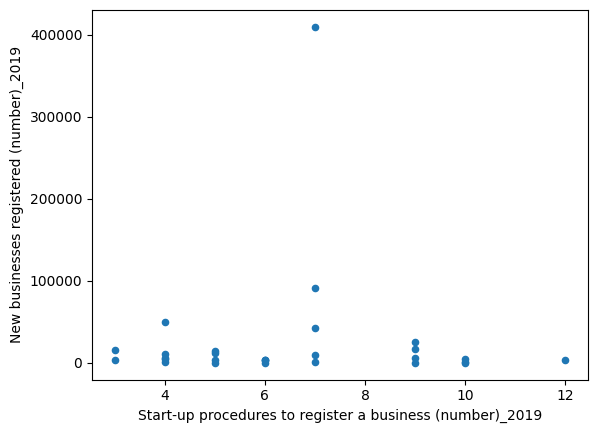

In [6]:
wb_business_df.plot(x = 'Start-up procedures to register a business (number)_2019', y = 'New businesses registered (number)_2019', kind = 'scatter')

In [275]:
wb_business_df['Foreign direct investment, net inflows (% of GDP)_2019'].mean()

2.811023551022013

In [277]:
wb_business_df.sort_values(by=['Foreign direct investment, net inflows (% of GDP)_2019'], ascending=False).head(5)[['iso_country_code3','Foreign direct investment, net inflows (% of GDP)_2019']]

,iso_country_code3,"Foreign direct investment, net inflows (% of GDP)_2019"
30,MOZ,21.784191
45,SYC,15.627489
17,GAB,9.204098
40,SLE,8.399200
43,STP,5.857918


## Visa Openness Index

In [307]:
import pandas as pd
import re
import pypdf

def extract_data_from_pdf(file_path, page):
    # Opening the PDF file
    with open(file_path, 'rb') as file:
        reader = pypdf.PdfReader(file)
        
        # Assuming the sentence is on the first page, adjust if needed
        page = reader.pages[page]
        text = page.extract_text()

        # Regex to find the specific sentence pattern with more flexible whitespace handling
        pattern = re.compile(r"No visa Visa on arrival Visa required ")
        match = re.search(pattern, text)
        
        if match:
            num_visitors = int(match.group(1).replace(',', ''))
            week = int(match.group(2))
            year = int(match.group(3))
            return num_visitors, week, year
        else:
            return None, None, None


In [308]:
reader = pypdf.PdfReader(r'/Users/dhruvpandit/Library/CloudStorage/OneDrive-NovaSBE/15. Research/10. Business Report/AVOI–2023_Final_R18_7dec23.pdf')
page = reader.pages[47]
text = page.extract_text()


In [309]:
#Define the regex pattern to match the lines with country data
pattern = re.compile(r'\n(?P<Country>[A-Za-z\s,]+)\s+(?P<NoVisa>\d+)\s+(?P<VisaOnArrival>\d+)\s+(?P<VisaRequired>\d+)\s+(?P<Score>\d\.\d{3})\s+(?P<Rank>\d+)')

# Find all matches in the text
matches = pattern.findall(text)

# Create a DataFrame from the matches
df_visa = pd.DataFrame(matches, columns=['Country', 'NoVisa', 'VisaOnArrival', 'VisaRequired', 'Score', 'Rank'])

# Convert numerical columns to appropriate data types
df_visa['NoVisa'] = df_visa['NoVisa'].astype(int)
df_visa['VisaOnArrival'] = df_visa['VisaOnArrival'].astype(int)
df_visa['VisaRequired'] = df_visa['VisaRequired'].astype(int)
df_visa['Score'] = df_visa['Score'].astype(float)
df_visa['Rank'] = df_visa['Rank'].astype(int)

In [69]:
#df_visa.to_excel(r'../../../datasets/research/business_report/visa_open.xlsx')

In [310]:
df_visa = pd.read_excel('../../../datasets/research/business_report/visa_open.xlsx')

In [105]:
import plotly.express as px

fig = px.bar(df_visa, x=["NoVisa", "VisaOnArrival", "VisaRequired"],y="Country",  orientation='h', title="Visa Status for Countries Within Africa", height=800)
fig.update_layout(yaxis={"dtick":1},margin={"t":100,"b":100},height=900)
fig.show()

## Business Cities

In [311]:
def extract_data_from_pdf_statista(file_path, page_number):
    # Open the PDF file
    with open(file_path, 'rb') as file:
        reader = pypdf.PdfReader(file)
        
        # Extract text from the specified page
        page = reader.pages[page_number]
        text = page.extract_text()

        # Define regex pattern to extract rank, city, and score
        pattern = re.compile(r"(\d+)\s+([A-Za-z\s,]+)\s+(\d+\.\d{2})")
        matches = pattern.findall(text)
        
        # Create a DataFrame from the extracted matches
        df = pd.DataFrame(matches, columns=['Rank', 'City', 'Total Score'])
        
        # Convert data types
        df['Rank'] = df['Rank'].astype(int)
        df['Total Score'] = df['Total Score'].astype(float)
        
        return df

# File path to the PDF and page number
file_path = '/Users/dhruvpandit/Downloads/study_id62120_statista-global-business-cities.pdf'
page_number = 11  # Adjust the page number as needed

# Extract data from the PDF
df_extracted = extract_data_from_pdf_statista(file_path, 10)
df_extracted_2 = extract_data_from_pdf_statista(file_path, page_number)
df_business_cities = pd.concat([df_extracted, df_extracted_2], ignore_index=True)

In [312]:
cities_df = pd.read_csv('/Users/dhruvpandit/Downloads/world-city-listing-table.csv')
cities_df = cities_df[['city', 'country']]
country_data = df_complete['country_name'].unique() #dict(zip(df_complete['country_name'],df_complete['iso3_country_code']))
cities_df = cities_df[cities_df['country'].isin(country_data)]
df_business_cities = df_business_cities[df_business_cities['City'].isin(cities_df['city'].unique())]

In [313]:
print(df_business_cities.to_markdown())

|     |   Rank | City         |   Total Score |
|----:|-------:|:-------------|--------------:|
| 141 |    176 | Cairo        |         31.84 |
| 143 |    178 | Algiers      |         31.32 |
| 146 |    181 | Johannesburg |         30.33 |
| 149 |    184 | Casablanca   |         28.84 |
| 155 |    190 | Nairobi      |         24.01 |
| 160 |    195 | Cape Town    |         17.14 |
| 161 |    196 | Accra        |         16.48 |
| 164 |    199 | Lagos        |         10.7  |
| 165 |    200 | Luanda       |          0    |


# Airlines

In [4]:
# get the response in the form of html
def get_destinations(wikiurl, table = 0):
    #wikiurl="https://en.wikipedia.org/wiki/List_of_South_African_Airways_destinations"
    table_class="wikitable sortable jquery-tablesorter"
    response=requests.get(wikiurl)
    print(response.status_code)
        # parse data from the html into a beautifulsoup object
    soup = BeautifulSoup(response.text, 'html.parser')
    indiatable=soup.find_all('table',{'class':"wikitable"})[table]
    df=pd.read_html(str(indiatable))
    # convert list to dataframe
    df=pd.DataFrame(df[0])
    if 'Notes' in df.columns.tolist():
        df = df[df['Notes'] != 'Terminated']
    return df

In [5]:
south_a_df = get_destinations('https://en.wikipedia.org/wiki/List_of_South_African_Airways_destinations')
eal_df = get_destinations('https://en.wikipedia.org/wiki/List_of_Ethiopian_Airlines_destinations')
egyptair = get_destinations('https://en.wikipedia.org/wiki/List_of_Egyptair_destinations')
kenya_air = get_destinations("https://en.wikipedia.org/wiki/List_of_Kenya_Airways_destinations")
ramoroc = get_destinations("https://en.wikipedia.org/wiki/List_of_Royal_Air_Maroc_destinations")
air_algeri = get_destinations("https://en.wikipedia.org/wiki/Air_Alg%C3%A9rie#Destinations", table=1)

200
200
200
200
200
200


In [6]:
from geopy.geocoders import Nominatim
from shapely.geometry import Point, LineString


def add_coordinates(df, user_agent, city_column='City'):
    # Initialize the geolocator
    geolocator = Nominatim(user_agent=user_agent)
    
    # Function to get Point object from city name
    def get_point(city):
        try:
            location = geolocator.geocode(city)
            if location:
                return Point(location.longitude, location.latitude)
            else:
                return None
        except:
            return None

    # Apply the function to the city column using .loc to avoid SettingWithCopyWarning
    df.loc[:, 'coordinate'] = df[city_column].apply(get_point)
    
    return df

In [7]:
south_a_df = add_coordinates(df = south_a_df, user_agent='withafrica_d2')

In [8]:
egyptair = add_coordinates(df = egyptair,user_agent='novasbe_dskc')

In [9]:
eal_df = add_coordinates(df = eal_df, user_agent='withafrica_dstwo')
eal_df = eal_df[eal_df['Notes'].isin(['Hub', 'Passenger'])]

In [10]:
kenya_air = add_coordinates(df=kenya_air, user_agent='withnovasbe')

In [11]:
ramoroc = add_coordinates(df = ramoroc, user_agent='novaimswith')

In [12]:
air_algeri = add_coordinates(df = air_algeri, user_agent='withnovaims3')

In [13]:
egyptair['origin'] = egyptair.query("City == 'Cairo'")['coordinate'].values[0]
south_a_df['origin'] = south_a_df.query("City == 'Johannesburg'")['coordinate'].values[0]
eal_df['origin'] = eal_df.query("City == 'Addis Ababa'")['coordinate'].values[0]
#--
kenya_air['origin'] = kenya_air.query("City == 'Nairobi'")['coordinate'].values[0]
ramoroc['origin'] = ramoroc.query("Notes == 'Hub'")['coordinate'].values[0]
air_algeri['origin'] = air_algeri.query("Notes == 'Hub'")['coordinate'].values[0]
eal_df = eal_df.dropna(subset=['coordinate'])

In [14]:
egyptair['geometry'] = egyptair.apply(lambda row: LineString([row['coordinate'], row['origin']]), axis=1)
south_a_df['geometry'] = south_a_df.apply(lambda row: LineString([row['coordinate'], row['origin']]),axis=1)
eal_df['geometry'] = eal_df.apply(lambda row: LineString([row['coordinate'], row['origin']]),axis=1)
kenya_air['geometry'] = kenya_air.apply(lambda row: LineString([row['coordinate'], row['origin']]),axis=1)
ramoroc['geometry'] = ramoroc.apply(lambda row: LineString([row['coordinate'], row['origin']]),axis=1)
air_algeri['geometry'] = air_algeri.apply(lambda row: LineString([row['coordinate'], row['origin']]),axis=1)

In [40]:
import geopandas as gpd
egyptair_gdf = gpd.GeoDataFrame(egyptair, geometry='geometry')
egyptair_gdf = egyptair_gdf.set_crs('epsg:3857')
south_a_gdf = gpd.GeoDataFrame(south_a_df, geometry='geometry')
south_a_gdf = south_a_gdf.set_crs('epsg:3857')
eal_gdf = gpd.GeoDataFrame(eal_df, geometry='geometry')
eal_gdf = eal_gdf.set_crs('epsg:3857')
kenya_air_gdf = gpd.GeoDataFrame(kenya_air, geometry='geometry')
kenya_air_gdf = kenya_air_gdf.set_crs('epsg:3857')
ramoroc_gdf = gpd.GeoDataFrame(ramoroc, geometry='geometry')
ramoroc_gdf = ramoroc_gdf.set_crs('epsg:3857')
air_algeri_gdf = gpd.GeoDataFrame(air_algeri, geometry='geometry')
air_algeri_gdf = air_algeri_gdf.set_crs('epsg:3857')

In [35]:
airports_gdf.head()

,coordinate,country
0,POINT (3.05884 36.77293),[Algeria]
4,POINT (16.37250 48.20835),[Austria]
5,POINT (50.58224 26.22350),[]
6,POINT (90.38902 23.76440),[Bangladesh]
7,POINT (4.35123 50.85500),[Belgium]


/var/folders/6c/vby383sn3xlg0j_c253f0sf40000gn/T/ipykernel_21676/1372584394.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


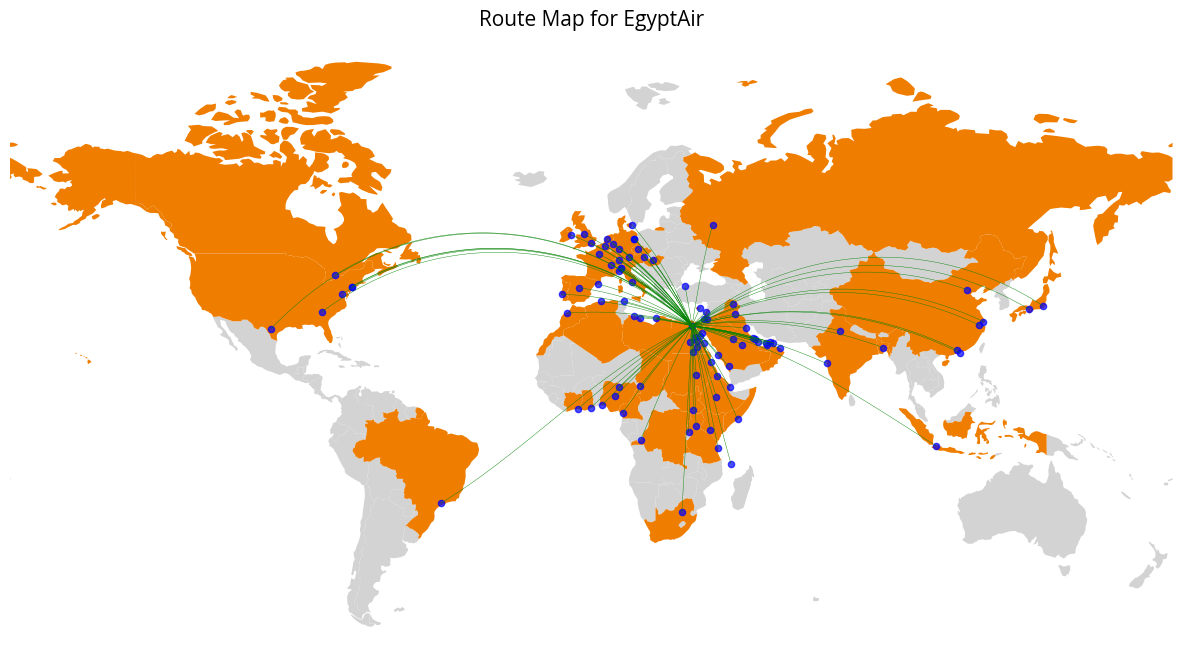

In [58]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# Create a GeoDataFrame for airport coordinates
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_path = '/Users/dhruvpandit/Library/Fonts/OpenSans-Regular.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Exclude Antarctica and Arctic regions
world = world[(world.name != "Antarctica") & (world.name != "Greenland")]

# Create a GeoDataFrame for airport coordinates
airports_gdf = gpd.GeoDataFrame(egyptair_gdf[['coordinate']], geometry='coordinate')

# Determine the countries with destinations
airports_gdf['country'] = airports_gdf.apply(lambda row: world[world.contains(row['coordinate'])].name.values, axis=1)
dest_countries = airports_gdf['country'].explode().unique()

# Create a new column in the world GeoDataFrame to indicate the presence of a destination
world['has_destination'] = world['name'].apply(lambda x: x in dest_countries)

# Create a plot with a specific projection
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})

# Fill countries based on the presence of a destination
world[world['has_destination'] == False].plot(ax=ax, transform=ccrs.Geodetic(), color='lightgray')
world[world['has_destination'] == True].plot(ax=ax, transform=ccrs.Geodetic(), color='#EF7D00')

egyptair_gdf.plot(ax=ax, transform=ccrs.Geodetic(), color='green', linewidth=0.3)

# Plot the airport points
airports_gdf.plot(ax=ax, transform=ccrs.Geodetic(), color='blue', markersize=20, alpha=0.7)
ax.axis('off')
# Set the title
plt.title('Route Map for EgyptAir', fontsize=15)

# Show the plot
plt.show()

/var/folders/6c/vby383sn3xlg0j_c253f0sf40000gn/T/ipykernel_21676/1383120261.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


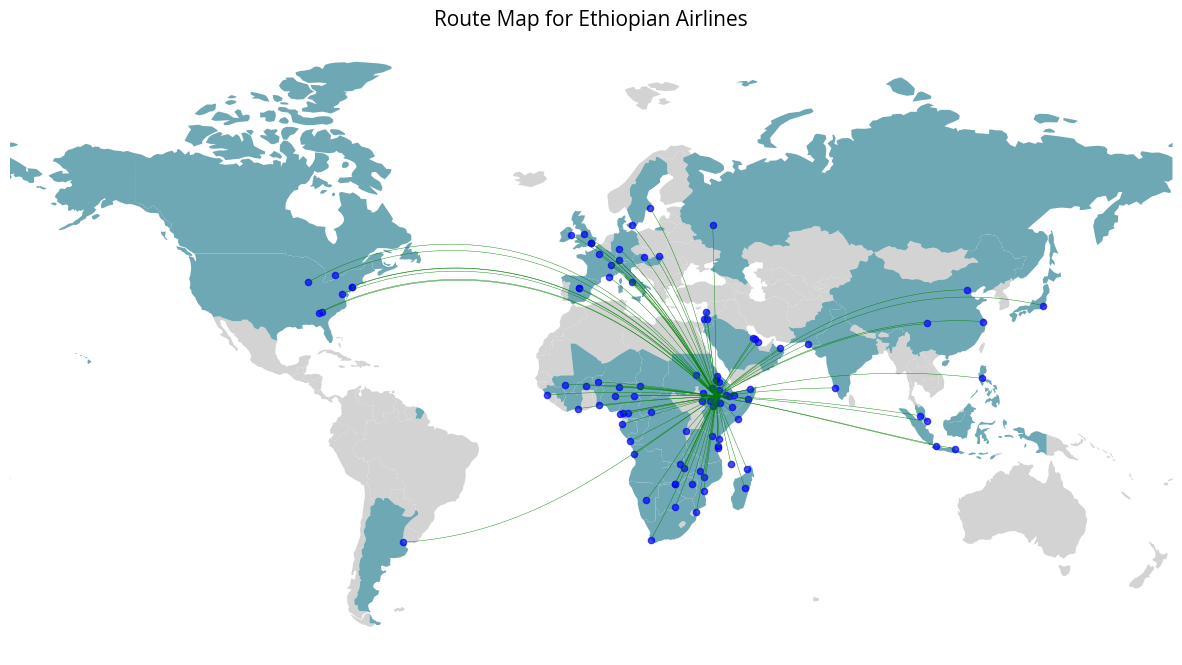

In [59]:
# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Exclude Antarctica and Arctic regions
world = world[(world.name != "Antarctica") & (world.name != "Greenland")]

# Create a GeoDataFrame for airport coordinates
airports_gdf = gpd.GeoDataFrame(eal_gdf[['coordinate']], geometry='coordinate')

# Determine the countries with destinations
airports_gdf['country'] = airports_gdf.apply(lambda row: world[world.contains(row['coordinate'])].name.values, axis=1)
dest_countries = airports_gdf['country'].explode().unique()

# Create a new column in the world GeoDataFrame to indicate the presence of a destination
world['has_destination'] = world['name'].apply(lambda x: x in dest_countries)

# Create a plot with a specific projection
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})

# Fill countries based on the presence of a destination
world[world['has_destination'] == False].plot(ax=ax, transform=ccrs.Geodetic(), color='lightgray')
world[world['has_destination'] == True].plot(ax=ax, transform=ccrs.Geodetic(), color='#6EA8B4')

eal_gdf.plot(ax=ax, transform=ccrs.Geodetic(), color='green', linewidth=0.3)

# Plot the airport points
airports_gdf.plot(ax=ax, transform=ccrs.Geodetic(), color='blue', markersize=20, alpha=0.7)
ax.axis('off')
# Set the title
plt.title('Route Map for Ethiopian Airlines', fontsize=15)

# Show the plot
plt.show()

/var/folders/6c/vby383sn3xlg0j_c253f0sf40000gn/T/ipykernel_21676/365609638.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


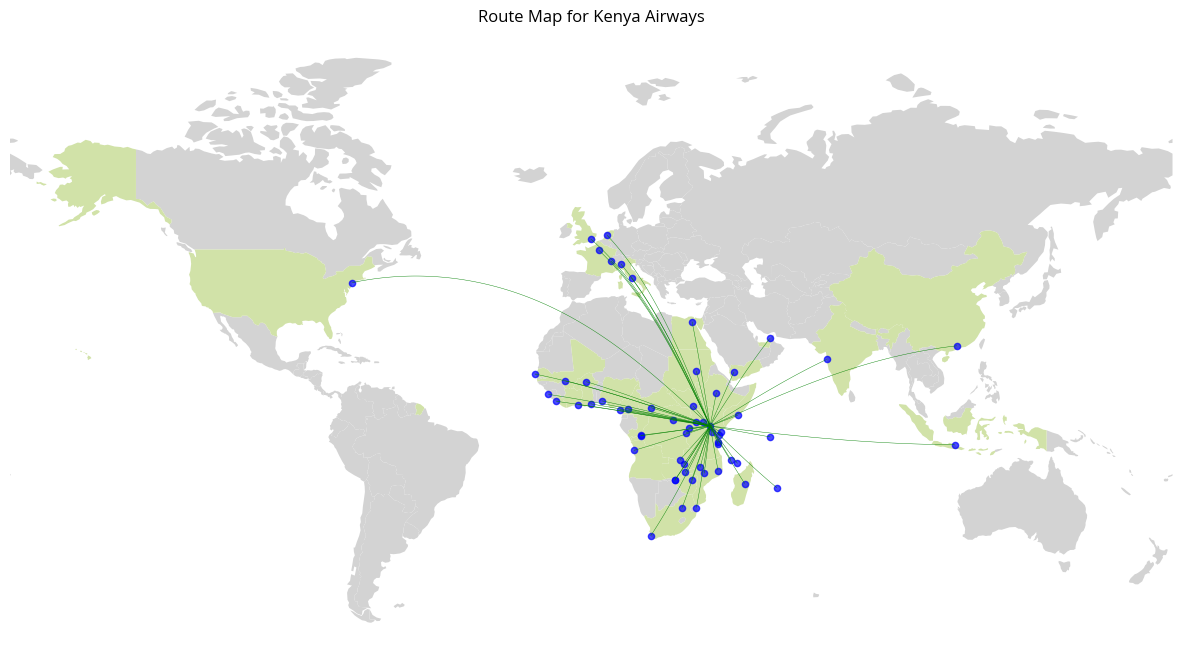

In [60]:
# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Exclude Antarctica and Arctic regions
world = world[(world.name != "Antarctica") & (world.name != "Greenland")]

# Create a GeoDataFrame for airport coordinates
airports_gdf = gpd.GeoDataFrame(kenya_air_gdf[['coordinate']], geometry='coordinate')

# Determine the countries with destinations
airports_gdf['country'] = airports_gdf.apply(lambda row: world[world.contains(row['coordinate'])].name.values, axis=1)
dest_countries = airports_gdf['country'].explode().unique()

# Create a new column in the world GeoDataFrame to indicate the presence of a destination
world['has_destination'] = world['name'].apply(lambda x: x in dest_countries)

# Create a plot with a specific projection
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})

# Fill countries based on the presence of a destination
world[world['has_destination'] == False].plot(ax=ax, transform=ccrs.Geodetic(), color='lightgray')
world[world['has_destination'] == True].plot(ax=ax, transform=ccrs.Geodetic(), color='#D1E2A8')

kenya_air_gdf.plot(ax=ax, transform=ccrs.Geodetic(), color='green', linewidth=0.3)

# Plot the airport points
airports_gdf.plot(ax=ax, transform=ccrs.Geodetic(), color='blue', markersize=20, alpha=0.7)
ax.axis('off')

# Set the title
plt.title('Route Map for Kenya Airways')

# Show the plot
plt.show()

/var/folders/6c/vby383sn3xlg0j_c253f0sf40000gn/T/ipykernel_21676/784539062.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


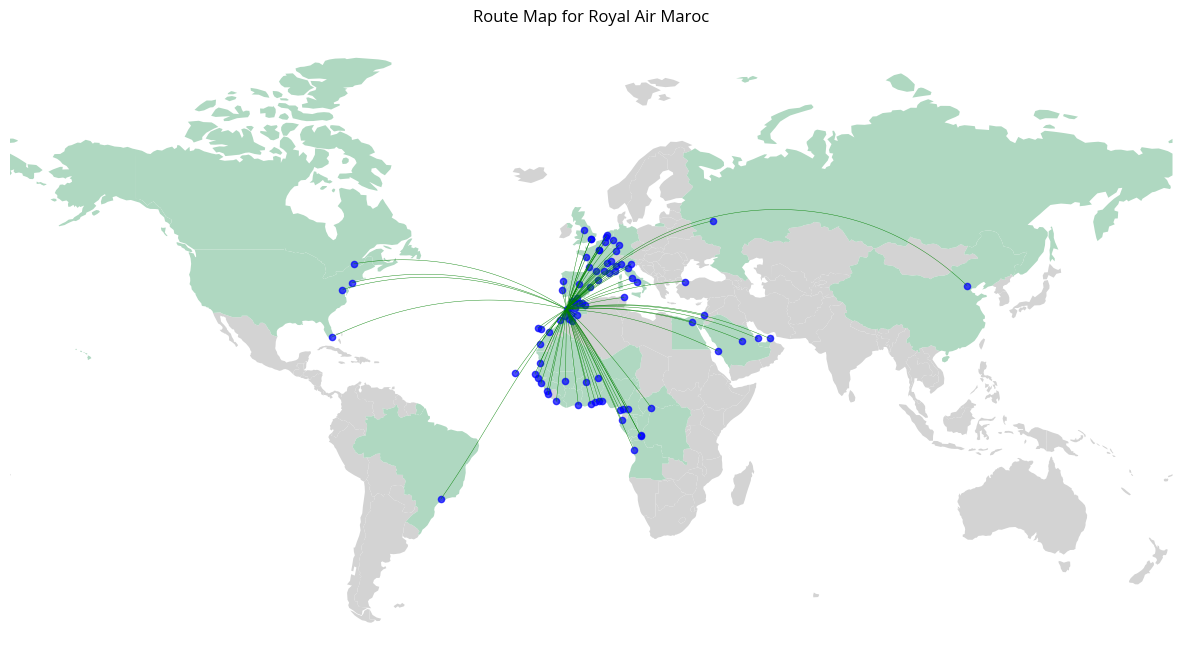

In [61]:
# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Exclude Antarctica and Arctic regions
world = world[(world.name != "Antarctica") & (world.name != "Greenland")]

# Create a GeoDataFrame for airport coordinates
airports_gdf = gpd.GeoDataFrame(ramoroc_gdf[['coordinate']], geometry='coordinate')

# Determine the countries with destinations
airports_gdf['country'] = airports_gdf.apply(lambda row: world[world.contains(row['coordinate'])].name.values, axis=1)
dest_countries = airports_gdf['country'].explode().unique()

# Create a new column in the world GeoDataFrame to indicate the presence of a destination
world['has_destination'] = world['name'].apply(lambda x: x in dest_countries)

# Create a plot with a specific projection
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})

# Fill countries based on the presence of a destination
world[world['has_destination'] == False].plot(ax=ax, transform=ccrs.Geodetic(), color='lightgray')
world[world['has_destination'] == True].plot(ax=ax, transform=ccrs.Geodetic(), color='#AFD8C1')

ramoroc_gdf.plot(ax=ax, transform=ccrs.Geodetic(), color='green', linewidth=0.3)

# Plot the airport points
airports_gdf.plot(ax=ax, transform=ccrs.Geodetic(), color='blue', markersize=20, alpha=0.7)
ax.axis('off')

# Set the title
plt.title('Route Map for Royal Air Maroc')

# Show the plot
plt.show()

/var/folders/6c/vby383sn3xlg0j_c253f0sf40000gn/T/ipykernel_21676/2881032369.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


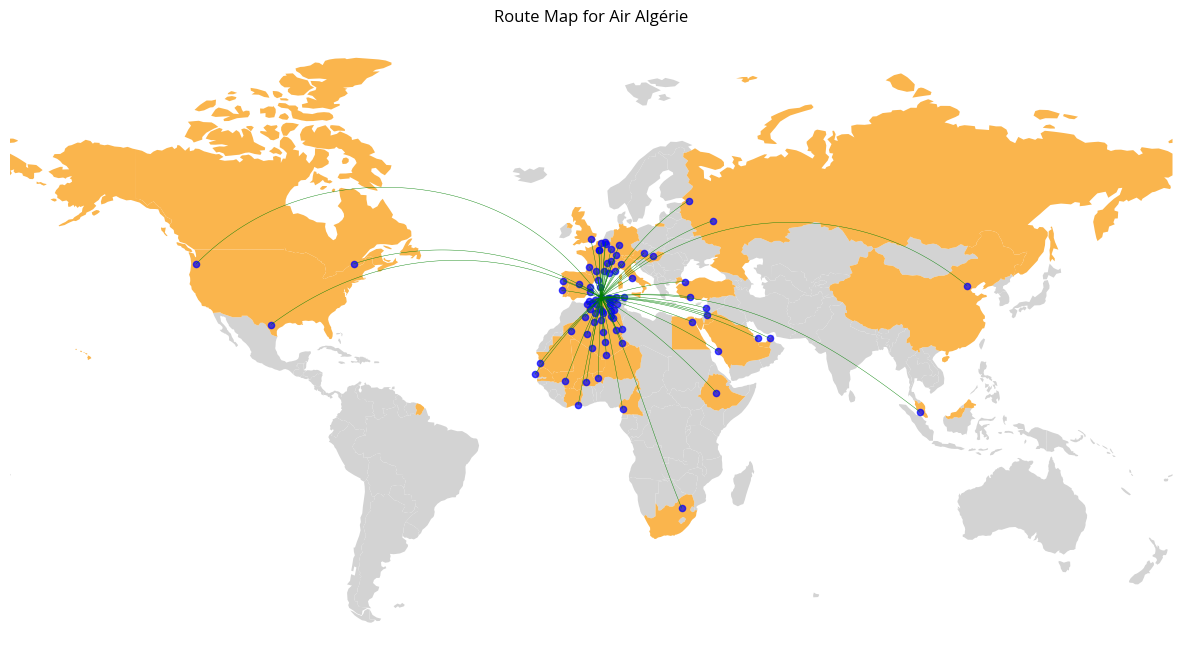

In [62]:
# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Exclude Antarctica and Arctic regions
world = world[(world.name != "Antarctica") & (world.name != "Greenland")]

# Create a GeoDataFrame for airport coordinates
airports_gdf = gpd.GeoDataFrame(air_algeri_gdf[['coordinate']], geometry='coordinate')

# Determine the countries with destinations
airports_gdf['country'] = airports_gdf.apply(lambda row: world[world.contains(row['coordinate'])].name.values, axis=1)
dest_countries = airports_gdf['country'].explode().unique()

# Create a new column in the world GeoDataFrame to indicate the presence of a destination
world['has_destination'] = world['name'].apply(lambda x: x in dest_countries)

# Create a plot with a specific projection
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})

# Fill countries based on the presence of a destination
world[world['has_destination'] == False].plot(ax=ax, transform=ccrs.Geodetic(), color='lightgray')
world[world['has_destination'] == True].plot(ax=ax, transform=ccrs.Geodetic(), color='#FAB54D')

air_algeri_gdf.plot(ax=ax, transform=ccrs.Geodetic(), color='green', linewidth=0.3)

# Plot the airport points
airports_gdf.plot(ax=ax, transform=ccrs.Geodetic(), color='blue', markersize=20, alpha=0.7)
ax.axis('off')

# Set the title
plt.title('Route Map for Air Algérie')

# Show the plot
plt.show()

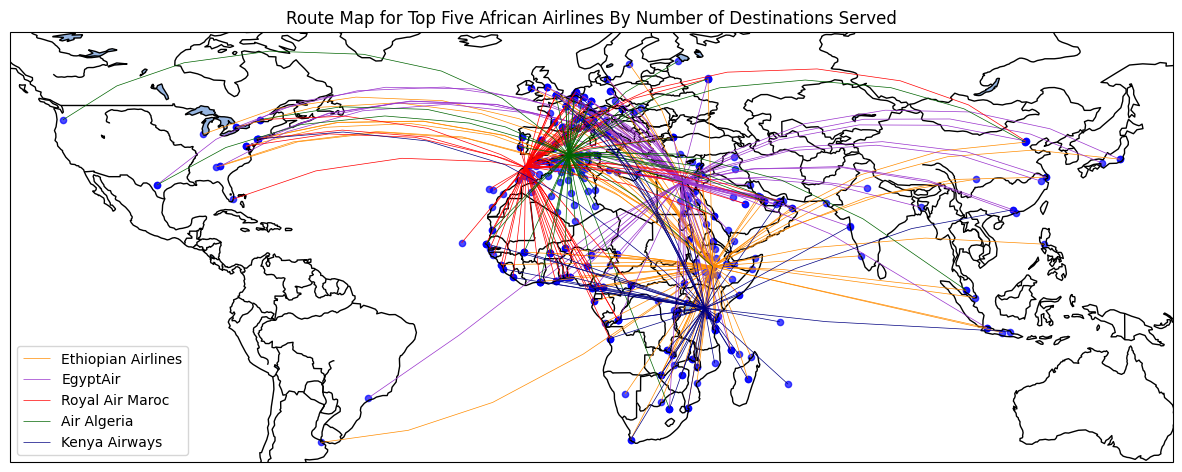

In [262]:
# Create a GeoDataFrame for airport coordinates
airports_gdf = gpd.GeoDataFrame(pd.concat([air_algeri_gdf[['coordinate']], kenya_air_gdf[['coordinate']],
                                            eal_gdf[['coordinate']], egyptair_gdf[['coordinate']], ramoroc_gdf[['coordinate']]]), geometry='coordinate')

# Create a plot with a specific projection
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the routes
eal_gdf.plot(ax=ax, transform=ccrs.Geodetic(), color='darkorange', linewidth=0.5, label = "Ethiopian Airlines")
egyptair_gdf.plot(ax=ax, transform=ccrs.Geodetic(), color='darkorchid', linewidth=0.5, label = "EgyptAir")
ramoroc_gdf.plot(ax=ax, transform=ccrs.Geodetic(), color='red', linewidth=0.5, label = "Royal Air Maroc")
air_algeri_gdf.plot(ax=ax, transform=ccrs.Geodetic(), color='darkgreen', linewidth=0.5, label = 'Air Algeria')
kenya_air_gdf.plot(ax=ax, transform=ccrs.Geodetic(), color='navy', linewidth=0.5, label = "Kenya Airways")
# Plot the airport points
airports_gdf.plot(ax=ax, transform=ccrs.Geodetic(), color='blue', markersize=20, alpha=0.7)

# Add coastlines
ax.coastlines(color='black')

# Add country borders
ax.add_feature(cfeature.BORDERS, edgecolor='black')

# Optionally add other features such as lakes and rivers
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

# Set the title
plt.title('Route Map for Top Five African Airlines By Number of Destinations Served')
legend = ax.legend(loc='lower left')
# Show the plot
plt.show()